In [1]:
import os
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [2]:
train_path = os.path.join("Data", "FIFA_train.csv")
test_path = os.path.join("Data", "FIFA_test.csv")
submission_path = os.path.join("Data", "submission.csv")

In [3]:
train = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int64  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int64  
 9   stat_potential    8932 non-null   int64  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 837.5+ KB


In [5]:
train[["age","stat_overall", "stat_potential"]] = train[["age","stat_overall", "stat_potential"]].astype(np.int32)

In [6]:
# int형으로 바꿈으로써 memory 사용량을 줄였음. 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                8932 non-null   int64  
 1   name              8932 non-null   object 
 2   age               8932 non-null   int32  
 3   continent         8932 non-null   object 
 4   contract_until    8932 non-null   object 
 5   position          8932 non-null   object 
 6   prefer_foot       8932 non-null   object 
 7   reputation        8932 non-null   float64
 8   stat_overall      8932 non-null   int32  
 9   stat_potential    8932 non-null   int32  
 10  stat_skill_moves  8932 non-null   float64
 11  value             8932 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(5)
memory usage: 732.8+ KB


In [7]:
# 기술 통계량 확인 -> 숫자형 데이터만 나옴
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,8932.0,7.966776e+03,4.844429e+03,0.0,3751.75,7696.5,12082.25,16948.0
age,8932.0,2.520914e+01,4.635515e+00,16.0,21.00,25.0,28.00,40.0
reputation,8932.0,1.130878e+00,4.237919e-01,1.0,1.00,1.0,1.00,5.0
stat_overall,8932.0,6.709113e+01,6.854910e+00,47.0,63.00,67.0,72.00,94.0
stat_potential,8932.0,7.199720e+01,5.988147e+00,48.0,68.00,72.0,76.00,94.0
stat_skill_moves,8932.0,2.401702e+00,7.760476e-01,1.0,2.00,2.0,3.00,5.0
value,8932.0,2.778673e+06,5.840982e+06,10000.0,375000.00,825000.0,2600000.00,110500000.0


In [8]:
# 범주형끼리 모은 것
train[["continent", "contract_until", "prefer_foot", "position", "name"]].describe()

,continent,contract_until,prefer_foot,position,name
count,8932,8932,8932,8932,8932
unique,5,17,2,4,8932
top,europe,2019,right,MF,C. Essers
freq,5322,2366,6837,3428,1


In [9]:
# 정렬을 해서 데이터를 뽑아오기 
train.sort_values(by = "value", ascending=False)[:50]

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
17,30,Isco,26,europe,2022,ST,right,3.0,88,91,4.0,73500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
14,26,M. Salah,26,africa,2023,MF,left,3.0,88,89,4.0,69500000.0
18,32,Coutinho,26,south america,2023,ST,right,3.0,88,89,5.0,69500000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
26,45,P. Pogba,25,europe,2021,MF,right,4.0,87,91,5.0,64000000.0
7,14,N. Kanté,27,europe,2023,MF,right,3.0,89,90,2.0,63000000.0
27,47,R. Lukaku,25,europe,2022,ST,left,3.0,87,89,3.0,62500000.0


In [10]:
plt.style.use("fivethirtyeight")

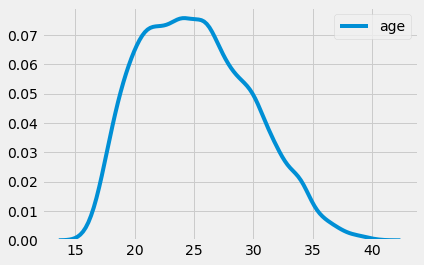

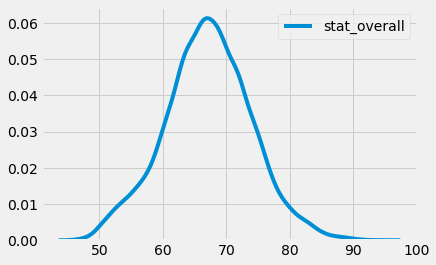

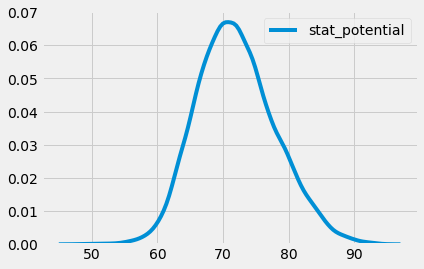

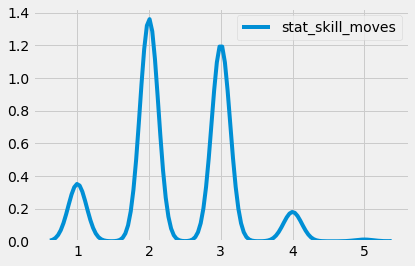

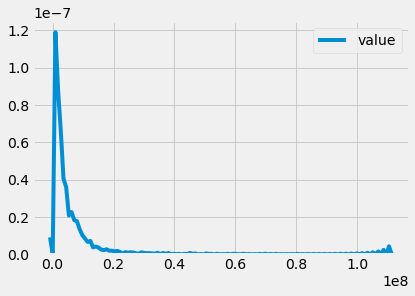

In [11]:
# 연속형 데이터는 분포부터, 범주형 데이터는 count 부터 함
# distribution
cols = ["age","stat_overall", "stat_potential", "stat_skill_moves","value"]
for col in cols:
    sns.kdeplot(train[col])
    # kdeplot 대신 distplot사용하면 분포도까지 같이 나옴.
    plt.show()

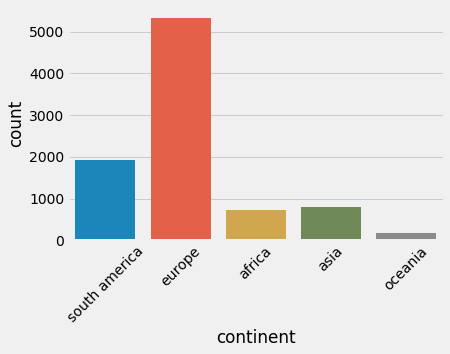

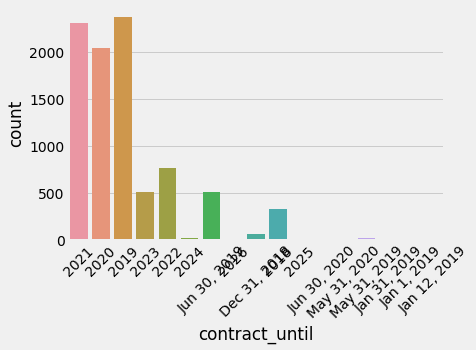

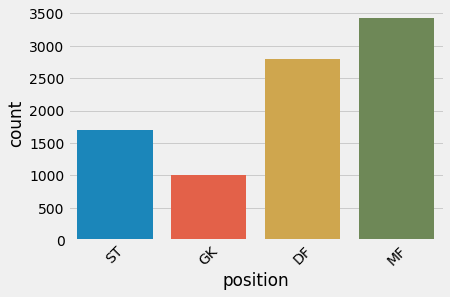

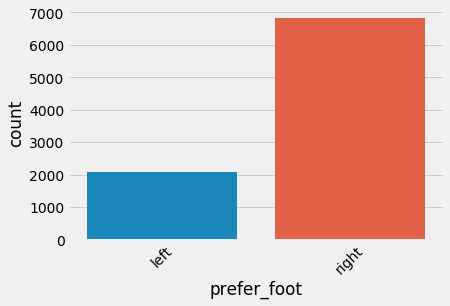

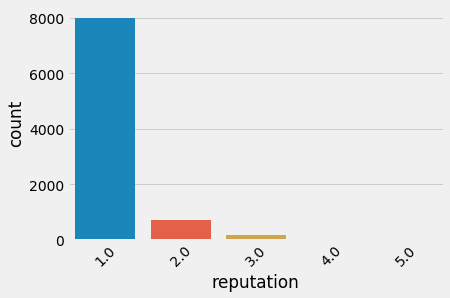

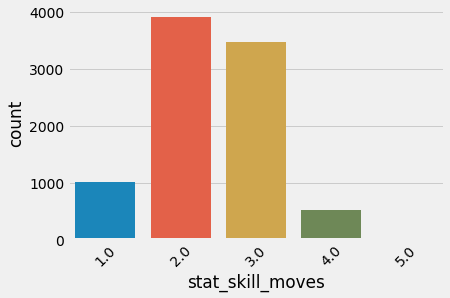

In [12]:
#countplot
cols = ["continent", "contract_until", "position", "prefer_foot", "reputation", "stat_skill_moves"]
for col in cols:
    sns.countplot(train[col]) 
    plt.xticks(rotation=45)
    plt.show()

In [13]:
# set_option하지 않고 사용하면 숫자가 너무 커서 다 보이지 않음. 따라서 option 설정.
pd.set_option("precision", 100)
train.groupby("reputation")["value"].mean()

reputation
1.0     1690091.71449962561018764972686767578125
2.0     8639220.96317280456423759460449218750000
3.0    22014830.50847457721829414367675781250000
4.0    33429032.25806451588869094848632812500000
5.0    60625000.00000000000000000000000000000000
Name: value, dtype: float64

In [14]:
train.groupby(["reputation", "stat_skill_moves"])["value"].mean()
#train.groupby(["reputation", "stat_skill_moves"])["value"].mean().reset_index()하면 index 붙음

reputation  stat_skill_moves
1.0         1.0                   1041406.250000000000000000000000000000000
            2.0                    982351.270957274246029555797576904296875
            3.0                   2252813.620071684475988149642944335937500
            4.0                   6376045.016077170148491859436035156250000
            5.0                   6050000.000000000000000000000000000000000
2.0         1.0                   7947000.000000000000000000000000000000000
            2.0                   6837245.508982036262750625610351562500000
            3.0                   7242123.493975903838872909545898437500000
            4.0                  13671126.760563381016254425048828125000000
            5.0                  17470000.000000000000000000000000000000000
3.0         1.0                  20947368.421052630990743637084960937500000
            2.0                  22000000.000000000000000000000000000000000
            3.0                  17406967.21311475336551666

### 피쳐 엔지니어링
- 이를 함으로써 모델이 더 좋게, 혹은 안좋게 될 수도 있음.

In [15]:
train["contract_until"] = train["contract_until"].map(lambda x : x[-4:])

In [16]:
train["contract_until"].unique()

array(['2021', '2020', '2019', '2023', '2022', '2024', '2026', '2018',
       '2025'], dtype=object)

In [17]:
# 만료 년도 대신에 몇년 남았는지로 데이터를 바꾸기 (2018년도에 데이터 생성됬다 가정)
train["contract_until"] = train["contract_until"].astype(np.int32)

In [18]:
train["contract_until"] = train["contract_until"] - 2018

In [19]:
train["contract_until"]

0       3
1       2
2       3
3       2
4       3
       ..
8927    1
8928    2
8929    3
8930    3
8931    2
Name: contract_until, Length: 8932, dtype: int32

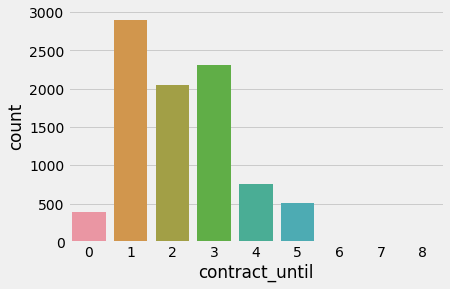

In [20]:
sns.countplot(train["contract_until"])

In [21]:
# stat_potential - stat_overall 하면 성장 가능한 정도를 알 수 있음
train["stat_potent"] = train["stat_potential"] - train["stat_overall"]

In [22]:
# 평균 은퇴나이(35)부터 얼마나 남았는지를 추가
train["retire_age"] = 35 - train["age"]

In [23]:
train.head()

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value,stat_potent,retire_age
0,0,L. Messi,31,south america,3,ST,left,5.0,94,94,4.0,110500000.0,0,4
1,3,De Gea,27,europe,2,GK,right,4.0,91,93,1.0,72000000.0,2,8
2,7,L. Suárez,31,south america,3,ST,right,5.0,91,91,3.0,80000000.0,0,4
3,8,Sergio Ramos,32,europe,2,DF,right,4.0,91,91,3.0,51000000.0,0,3
4,9,J. Oblak,25,europe,3,GK,right,3.0,90,93,1.0,68000000.0,3,10


### 다음시간 할 거
- ensemble, ffold, Gridsearch, Randomsearch

### 질문
- Boosting, randomforest, bagging의 차이점?